In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import colors
import numpy as np
import datetime as dt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os, ssl
from datetime import date
import glob
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
path=r'revamped_election_maps/'
all_files = glob.glob(path+"*_revamped.csv")

full_revamped=[]
for file in all_files:
    usecols=['id_number','dob','registration_date','voter_status','party_code','county_1','municipality',"muni_elect_2021_party",]
    df = pd.read_csv(file, usecols=usecols,low_memory=False,dtype=str)
    #usecols=['id_number','first_name','last_name','middle_name','last_vote_date','dob','party_code','registration_date','voter_status','municipality','county_1',]
    #df = df[['id_number','dob','registration_date','voter_status','party_code','county_1','municipality','gen_prim_2020_vote_method',"gen_prim_2020_party",'gen_elect_2020_vote_method',"gen_elect_2020_party",
    #         'muni_prima_2021_vote_method',"muni_prim_2021_party",'muni_elect_2020_vote_method',"muni_elect_2020_party"]]
    full_revamped.append(df)
df2=pd.concat(full_revamped,sort=False)

D        45.73
R        39.53
Other    14.74
Name: party1, dtype: float64


<AxesSubplot:>

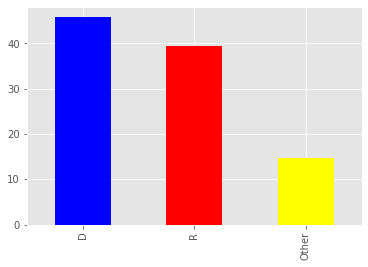

In [4]:
keys=["R",'D']
values=["R",'D']
party_dict=dict(zip(keys,values))
df2['party1']=df2.party_code.map(party_dict).replace(np.nan,'Other')

c=['Blue','Red','Yellow']

print(((df2['party1'].value_counts()/df2.id_number.count())*100).round(2))
((df2['party1'].value_counts()/df2.id_number.count())*100).round(2).plot(kind='bar',color=c)

In [5]:
df2['dob']=pd.to_datetime(df2.dob,errors="coerce")
df2['registration_date']=pd.to_datetime(df2.registration_date,errors="coerce")
#df2['last_vote_date']=pd.to_datetime(df2.last_vote_date,errors="coerce")
today=date.today()
df2['age']=((today-df2.dob.dt.date).dt.days)/365 

In [6]:
def get_num_people_by_age_category(df):
    df2["age_group"] = pd.cut(x=df2['age'], bins=[18,25,35,45,55,65,75,100], labels=["18-24","25-34","35-44","45-54","55-64","65-74","75+"])
    return df2

df2['age_group']=pd.cut(x=df2['age'], bins=[18,25,35,45,55,65,75,100], labels=["18-24","25-34","35-44","45-54","55-64","65-74","75+"])

In [7]:
roe=pd.to_datetime("2022-06-24")

df2[df2.registration_date.dt.date>=(today-pd.DateOffset(days=30))&(df2.registration_date.dt.date>=(today+pd.DateOffset(days=30)))]

<AxesSubplot:>

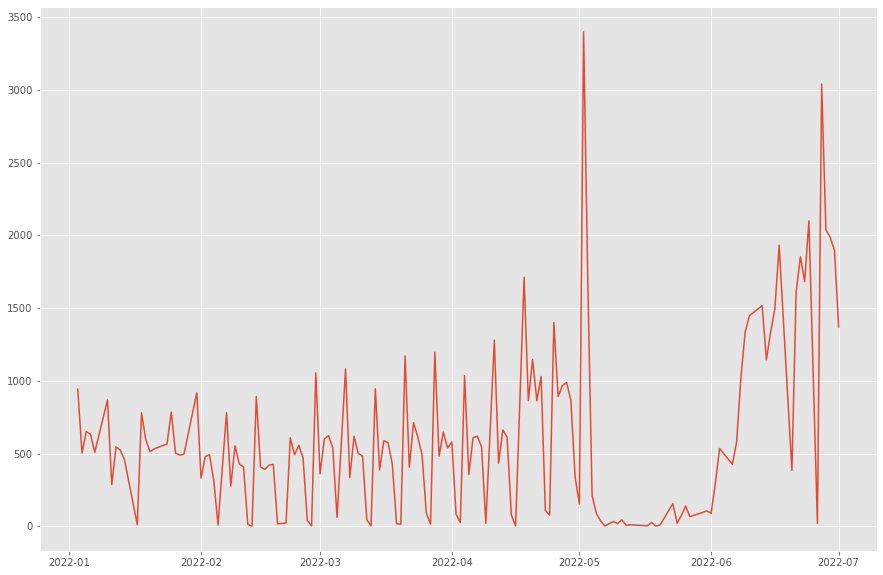

In [18]:
df2[df2.registration_date.dt.year==2022].registration_date.dt.date.value_counts().sort_index().plot(kind="line",figsize=(15,10))

In [8]:
df2[df2.registration_date.dt.year==2022].registration_date.dt.date.value_counts().sort_index().tail(30)

2022-05-23     157
2022-05-24      22
2022-05-25      75
2022-05-26     140
2022-05-27      67
2022-05-31     106
2022-06-01      90
2022-06-02     300
2022-06-03     535
2022-06-06     427
2022-06-07     581
2022-06-08    1023
2022-06-09    1334
2022-06-10    1448
2022-06-13    1517
2022-06-14    1145
2022-06-15    1336
2022-06-16    1497
2022-06-17    1932
2022-06-20     385
2022-06-21    1613
2022-06-22    1853
2022-06-23    1682
2022-06-24    2100
2022-06-26      20
2022-06-27    3039
2022-06-28    2039
2022-06-29    1987
2022-06-30    1900
2022-07-01    1370
Name: registration_date, dtype: int64

<AxesSubplot:>

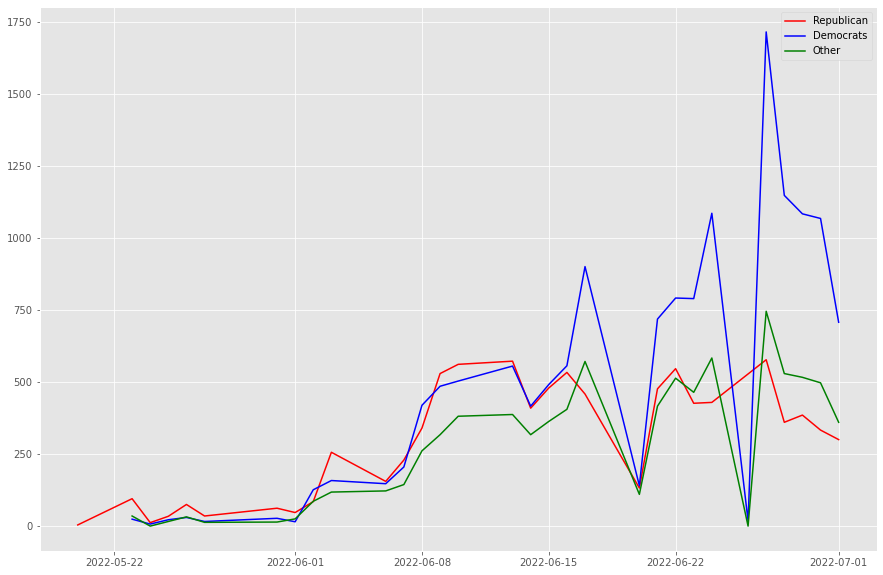

In [9]:
df2[(df2.party1=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.date.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party1=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.date.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.date.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='Other')

C:\Users\c_ull\AppData\Local\Temp/ipykernel_6776/2020687038.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.party1=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
C:\Users\c_ull\AppData\Local\Temp/ipykernel_6776/2020687038.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.party1=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
C:\Users\c_ull\AppData\Local\Temp/ipykernel_6776/2020687038.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year==2022)].registration_date.dt

<AxesSubplot:>

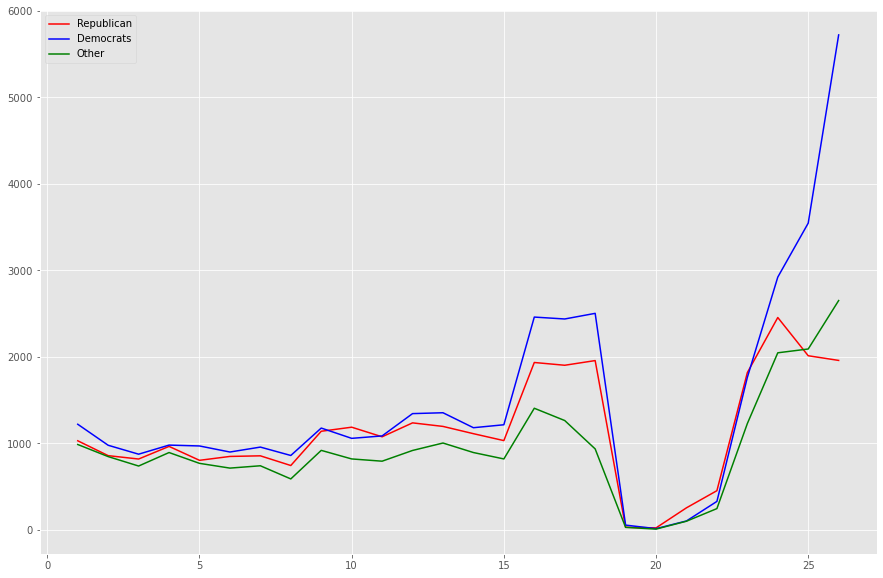

In [10]:
df2[(df2.party1=='R')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party1=='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year==2022)].registration_date.dt.week.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='Other')

<AxesSubplot:>

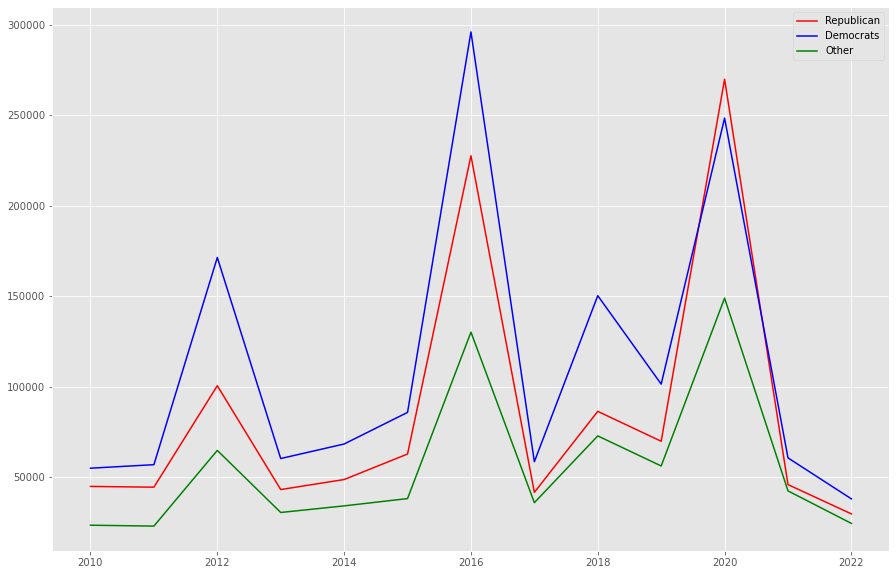

In [11]:
df2[(df2.party1=='R')&(df2.registration_date.dt.year>=2010)].registration_date.dt.year.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Red',label='Republican')
df2[(df2.party1=='D')&(df2.registration_date.dt.year>=2010)].registration_date.dt.year.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Blue',label='Democrats')
df2[(df2.party1!='R')&(df2.party1!='D')&(df2.registration_date.dt.year>=2010)].registration_date.dt.year.value_counts().sort_index().tail(30).plot(kind="line",figsize=(15,10),
                                                                                                                                legend=True,color='Green',label='Other')

In [20]:
df2.groupby(['county_1','dob','party1','age_group','voted_21']).registration_date.value_counts().sort_values()

county_1    dob         party1  age_group  voted_21     registration_date
ADAMS       1922-08-06  D       75+        Didn't Vote  1998-05-22            1
MONTGOMERY  1960-05-17  D       55-64      D            1999-01-05            1
                                                        1996-08-29            1
            1960-05-16  R       55-64      R            2016-11-12            1
                                           Didn't Vote  2022-02-15            1
                                                                             ..
            1954-09-27  D       65-74      D            1996-08-29           12
            1947-03-15  D       75+        D            1996-08-29           12
            1953-12-02  D       65-74      D            1996-08-29           13
            1954-04-26  D       65-74      D            1996-08-29           14
            1949-09-16  D       65-74      D            1996-08-29           15
Name: registration_date, Length: 8539909, dtyp

In [18]:
df2['voted_21']=df2['muni_elect_2021_party'].replace(np.nan,"Didn't Vote")